In [2]:
import logging
from pathlib import Path

import numpy as np
import pandas as pd
import pyvista as pv

from fenicsxconcrete.util import ureg

from amworkflow.geometry import GeometryCenterline
from amworkflow.meshing import MeshingGmsh
from amworkflow.gcode import GcodeFromPoints
from amworkflow.simulation import SimulationFenicsXConcrete

logging.basicConfig(level=logging.INFO)

%load_ext autoreload
%autoreload 2

# Toy problem for demonstrating the moduls of the AM workflow repo

In [3]:
# initialze parameter dict
params = { }

# define output directory 
OUTPUT_NAME = "toy"
OUTPUT = (
    Path.cwd() / "output_notebook"
) 
OUTPUT.mkdir(parents=True, exist_ok=True)

print(f"result files will be saved in folder: {OUTPUT}")


result files will be saved in folder: /Users/yuxianghe/Documents/BAM/amworkflow_restructure/examples/toy/output_notebook


## 1. Create design by centerline

In [4]:
# set design parameters
params["layer_thickness"] = 10.  # mm
params["height"] = 40.  # mm

# define centerline by points (x,y,z) as list:
points = [[0., 0., 0.],
          [0.,150.,0.],
          [10.,150.,0],
          [75.,75.,0.],
          [140.,150.,0.],
          [150.,150.,0.],
          [150.,0.,0.]]
L = 150
W = 150
t = 20
points = [[0., 0., 0.],
          [0.,(W-t)/2,0.],
          [(L-t/2),(W-t)/2,0.],
          [(L-t/2),-(W-t)/2,0.],
          [0.,-(W-t)/2,0.]]
params["points"] = points

# initialize geometry class
geometry = GeometryCenterline(**params)
# create stp, csv, stl
geometry.create(OUTPUT / f"{OUTPUT_NAME}.stp",  OUTPUT / f"{OUTPUT_NAME}.csv", OUTPUT / f"{OUTPUT_NAME}.stl")

DEBUG:amworkflow.geometry.builtinCAD:Creating OCC edge by points: 0, 2
DEBUG:amworkflow.geometry.builtinCAD:Creating OCC edge by points: 5, 0
DEBUG:amworkflow.geometry.builtinCAD:Creating OCC edge by points: 2, 3
DEBUG:amworkflow.geometry.builtinCAD:Creating OCC edge by points: 3, 4
DEBUG:amworkflow.geometry.builtinCAD:Creating OCC edge by points: 4, 5
DEBUG:amworkflow.geometry.builtinCAD:Creating OCC edge by points: 8, 11
DEBUG:amworkflow.geometry.builtinCAD:Creating OCC edge by points: 11, 14
DEBUG:amworkflow.geometry.builtinCAD:Creating OCC edge by points: 14, 17
DEBUG:amworkflow.geometry.builtinCAD:Creating OCC edge by points: 17, 19
DEBUG:amworkflow.geometry.builtinCAD:Creating OCC edge by points: 19, 8
DEBUG:amworkflow.geometry.builtinCAD:Creating OCC edge by points: 8, 9
DEBUG:amworkflow.geometry.builtinCAD:Creating OCC edge by points: 9, 20
DEBUG:amworkflow.geometry.builtinCAD:Creating OCC edge by points: 20, 18
DEBUG:amworkflow.geometry.builtinCAD:Creating OCC edge by points: 

[[8, 11, 14, 17, 19], [9, 20, 18, 15, 12]]

*******************************************************************
******        Statistics on Transfer (Write)                 ******

*******************************************************************
******        Transfer Mode = 0  I.E.  As Is       ******
******        Transferring Shape, ShapeType = 2                      ******
** WorkSession : Sending all data
 Step File Name : /Users/yuxianghe/Documents/BAM/amworkflow_restructure/examples/toy/output_notebook/toy.stp(852 ents)  Write  Done


In [5]:
# output:
[f for f in OUTPUT.iterdir() if f.is_file()]

[PosixPath('/Users/yuxianghe/Documents/BAM/amworkflow_restructure/examples/toy/output_notebook/toy.msh'),
 PosixPath('/Users/yuxianghe/Documents/BAM/amworkflow_restructure/examples/toy/output_notebook/toy.stp'),
 PosixPath('/Users/yuxianghe/Documents/BAM/amworkflow_restructure/examples/toy/output_notebook/toy.stl'),
 PosixPath('/Users/yuxianghe/Documents/BAM/amworkflow_restructure/examples/toy/output_notebook/toy.xdmf'),
 PosixPath('/Users/yuxianghe/Documents/BAM/amworkflow_restructure/examples/toy/output_notebook/toy.vtk'),
 PosixPath('/Users/yuxianghe/Documents/BAM/amworkflow_restructure/examples/toy/output_notebook/toy.csv'),
 PosixPath('/Users/yuxianghe/Documents/BAM/amworkflow_restructure/examples/toy/output_notebook/log_toy.csv'),
 PosixPath('/Users/yuxianghe/Documents/BAM/amworkflow_restructure/examples/toy/output_notebook/toy.h5'),
 PosixPath('/Users/yuxianghe/Documents/BAM/amworkflow_restructure/examples/toy/output_notebook/toy.gcode')]


No module named 'trame'

Falling back to a static output.
  warnings.warn(



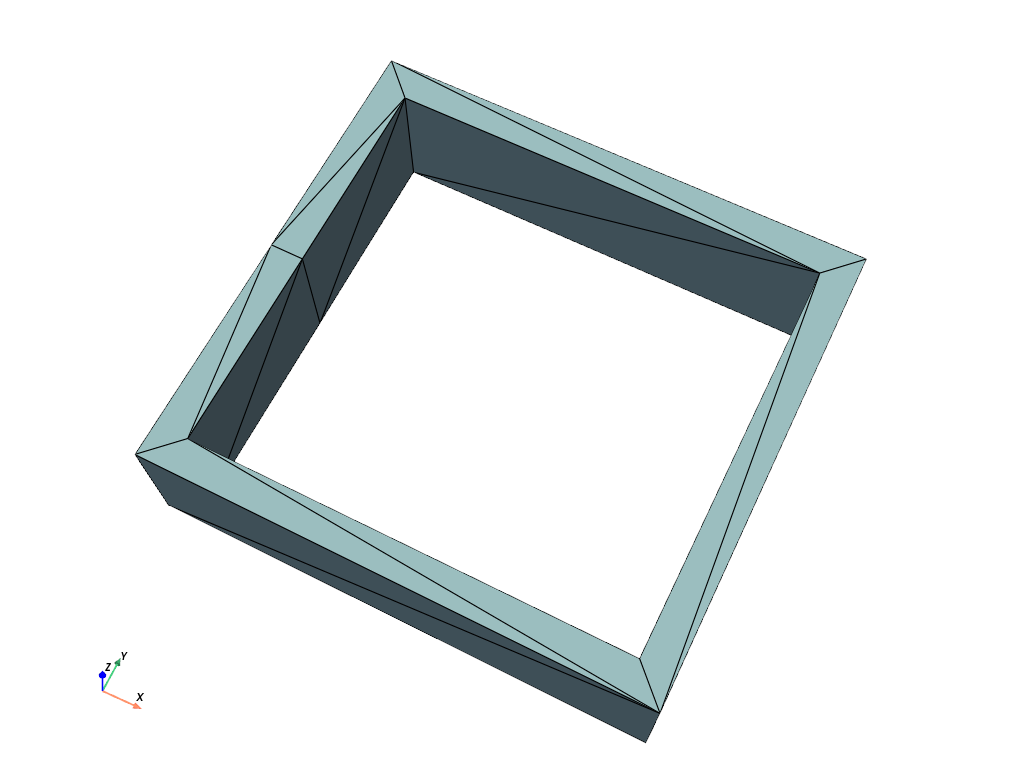

In [6]:
# display stl
mesh = pv.read(OUTPUT / f"{OUTPUT_NAME}.stl")
#mesh.plot(cpos='xy')
mesh.plot(cpos=[1, -2, 5], show_edges=True)

In [7]:
# load saved points:
pd.read_csv(OUTPUT / f"{OUTPUT_NAME}.csv")

,x,y
0,0.0,0.0
1,0.0,65.0
2,140.0,65.0
3,140.0,-65.0
4,0.0,-65.0


## 2. Create gcode from points

In [8]:
# define gcode parameters
#params[""]=...
params["layer_num"] = 4
params["layer_height"] = 10 #mm
params["layer_width"] = params["layer_thickness"]
params["offset_from_origin"] = [0, 0] # Offset from origin in mm
params["unit"] = "mm"    # Unit of the geometry
params["standard"] = "ConcretePrinter"   # Standard of the printer firmware
params["coordinate_system"] = "absolute" # Coordinate system of the printer firmware
params["nozzle_diameter"] = 0.4  # Diameter of the nozzle in mm
params["kappa"] = 1 # Parameter for the calculation of the extrusion width
params["tool_number"] = 0 # Tool number of the extruder. Expected to be an integer
params["feedrate"] = 1800 # Feedrate of the extruder in mm/min. Expected to be an integer
params["in_file_path"] = OUTPUT / f"{OUTPUT_NAME}.csv" # Path to the input file
params["out_gcode_dir"] = OUTPUT # Path to the output file

gcd = GcodeFromPoints(**params)
gcd.create(OUTPUT / f"{OUTPUT_NAME}.csv", OUTPUT / f"{OUTPUT_NAME}.gcode")

-0.021599999999999998
-6000000.000000001


In [9]:
# output:
[f for f in OUTPUT.iterdir() if f.is_file()]

[PosixPath('/Users/yuxianghe/Documents/BAM/amworkflow_restructure/examples/toy/output_notebook/toy.msh'),
 PosixPath('/Users/yuxianghe/Documents/BAM/amworkflow_restructure/examples/toy/output_notebook/toy.stp'),
 PosixPath('/Users/yuxianghe/Documents/BAM/amworkflow_restructure/examples/toy/output_notebook/toy.stl'),
 PosixPath('/Users/yuxianghe/Documents/BAM/amworkflow_restructure/examples/toy/output_notebook/toy.xdmf'),
 PosixPath('/Users/yuxianghe/Documents/BAM/amworkflow_restructure/examples/toy/output_notebook/toy.vtk'),
 PosixPath('/Users/yuxianghe/Documents/BAM/amworkflow_restructure/examples/toy/output_notebook/toy.csv'),
 PosixPath('/Users/yuxianghe/Documents/BAM/amworkflow_restructure/examples/toy/output_notebook/log_toy.csv'),
 PosixPath('/Users/yuxianghe/Documents/BAM/amworkflow_restructure/examples/toy/output_notebook/toy.h5'),
 PosixPath('/Users/yuxianghe/Documents/BAM/amworkflow_restructure/examples/toy/output_notebook/toy.gcode')]

In [ ]:
with open(OUTPUT / f"{OUTPUT_NAME}.gcode") as f:
    lines = [line for line in f]
print("".join(lines))

## 3. Create mesh from design

In [10]:
# define mesh parameters
params["mesh_size_factor"] = 1
params["number_of_layers"] =  4

meshing = MeshingGmsh(**params)
meshing.create(OUTPUT / f"{OUTPUT_NAME}.stp",OUTPUT / f"{OUTPUT_NAME}.xdmf",OUTPUT / f"{OUTPUT_NAME}.vtk")

ERROR:amworkflow.occ_helpers:Only one of nz or layer_height can be specified. You have specified both but the product of nz: 4 and layer_height: 10 is equal to the height of the shape: 40.0000002. I am just going to use nz.


In [ ]:
# output:
[f for f in OUTPUT.iterdir() if f.is_file()]

In [ ]:
# display xdmf
mesh = pv.read(OUTPUT / f"{OUTPUT_NAME}.xdmf")
#mesh.plot(cpos='xz', show_edges=True)
mesh.plot(cpos=[-10, -2, 5], show_edges=True)

## 4. Run simulation

In [ ]:
# define mesh parameters
params_sim_structure = {
    "mesh_unit": "mm" * ureg(""), 
    "dim": 3 * ureg(""),
    "degree": 2 * ureg(""),
    "q_degree": 2 * ureg(""),
    "bc_setting": "compr_disp_y" * ureg(""),
    "rho": 2400 * ureg("kg/m^3"),
    "g": 9.81 * ureg("m/s^2"),
    "E": 33000 * ureg("MPa"),
    "nu": 0.2 * ureg(""),
    "top_displacement": -5.0 * ureg("mm"),
    "material_type": "linear" * ureg(""),
    "experiment_type": "structure" * ureg(""),
    "number_steps": 3 * ureg(""),  # number of steps for simulation
}

simulation = SimulationFenicsXConcrete(params_sim_structure)
simulation.run(OUTPUT / f"{OUTPUT_NAME}.xdmf", OUTPUT / f"{OUTPUT_NAME}_sim_structure.xdmf")

In [ ]:
# output:
[f for f in OUTPUT.iterdir() if f.is_file()]

In [ ]:
# display xdmf
mesh = pv.read(OUTPUT / f"{OUTPUT_NAME}_sim_structure.xdmf")
#mesh.plot(cpos='xz', show_edges=True)
#mesh.plot(cpos=[-10, -2, 5], show_edges=True, scalars="displacement")
mesh.plot(cpos='xy', show_edges=True, scalars="displacement")